# Question 9 - Data Augmentation  with Torchvision

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset
from torchvision.utils import make_grid

c:\ProgramData\Anaconda3\envs\Py38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Turning Subsets into Datasets

## Some visualisation functions

In [2]:
def show(data_loader):

    images, foo = next(iter(data_loader))

    npimg = make_grid(images, normalize=True, pad_value=.5).numpy()
    fig, ax = plt.subplots(figsize=((13, 5)))
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.setp(ax, xticks=[], yticks=[])

    return fig, ax

In [3]:
def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')

## Transformations

In [4]:
# Transformations (applied in the same order as they are passed to the compose)
# Horizontal and vertical flips are really popular but a horizontal flip of 6 would become a 9 and
# vertical flips are not a realistic transformation encountered in the real world

# Zoom in with center crop
transform_1 = transforms.Compose([
                transforms.ToPILImage(),
                transforms.transforms.CenterCrop(18),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ])

# Zoom out with center crop
transform_2 = transforms.Compose([
                #transforms.ToPILImage(),
                transforms.CenterCrop(128),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ])

# Add color jitter
transform_3 = transforms.Compose([
                #transforms.ToPILImage(),
                transforms.ColorJitter(brightness=0.50, contrast=0.50, saturation=0.05, hue=0.05),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,)),
            ])

# Add Gaussian Blur
transform_4 = transforms.Compose([
                #transforms.ToPILImage(),
                transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ])

# Random Rotation with 45 degrees
transform_5 = transforms.Compose([
                #transforms.ToPILImage(),
                transforms.RandomRotation(degrees=45),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ])

## Testing the different transformations by transforming the entire dataset object

In [5]:
train_val = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform_2)
trainloader = torch.utils.data.DataLoader(train_val, batch_size=16, shuffle=True, num_workers=2)

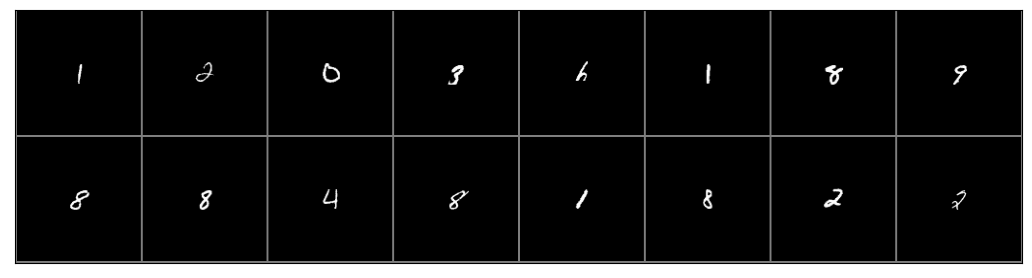

In [6]:
fig, ax = show(trainloader)
plt.show()

## Applying the transformations to subset objects

In [7]:
#Function to turn subset into dataset
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [8]:
train_size = 50000
val_size = 10000
train_val = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
train, val = torch.utils.data.random_split(train_val, [train_size, val_size])

In [9]:
split_1, split_2, split_3, split_4, split_5, remain_train = torch.utils.data.random_split(train, [1000, 1000, 1000, 1000, 1000, 45000])

In [11]:
augm_1 = DatasetFromSubset(subset=split_1, transform=transform_1)
augm_2 = DatasetFromSubset(subset=split_2, transform=transform_2)
augm_3 = DatasetFromSubset(subset=split_3, transform=transform_3)
augm_4 = DatasetFromSubset(subset=split_4, transform=transform_4)
augm_5 = DatasetFromSubset(subset=split_5, transform=transform_5)

In [12]:
train_complete = torch.utils.data.ConcatDataset([augm_1, augm_2, augm_3, augm_4, augm_5, train])
trainloader = torch.utils.data.DataLoader(train_complete, batch_size=16, shuffle=True, num_workers=2)

In [13]:
type(train_complete)

torch.utils.data.dataset.ConcatDataset

In [12]:
fig, ax = show(trainloader)
plt.show()